In [27]:
from warnings import filterwarnings
filterwarnings('ignore')

In [28]:
import pandas as pd
df = pd.read_csv('PowerPlant.csv')

In [29]:
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [31]:
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [32]:
df.duplicated().sum()

41

In [33]:
df.columns

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

In [34]:
x = df.drop(columns=['PE'])
y = df[['PE']]

In [35]:
x.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [36]:
y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


In [37]:
x.value_counts()

AT     V      AP       RH   
7.87   41.17  1020.33  77.77    2
27.64  75.60  1017.35  54.78    2
8.57   41.17  1020.18  72.47    2
9.54   41.17  1019.79  65.61    2
25.79  75.60  1017.46  75.63    2
                               ..
15.42  40.56  1021.23  59.37    1
15.43  38.58  1016.58  81.17    1
       39.16  1016.44  79.80    1
       39.64  1008.58  87.99    1
37.11  68.94  1006.23  31.15    1
Name: count, Length: 9527, dtype: int64

In [38]:
y.value_counts()

PE    
468.80    9
442.78    8
434.01    8
447.06    8
468.87    7
         ..
455.59    1
455.60    1
455.61    1
455.64    1
495.76    1
Name: count, Length: 4836, dtype: int64

<Axes: xlabel='PE'>

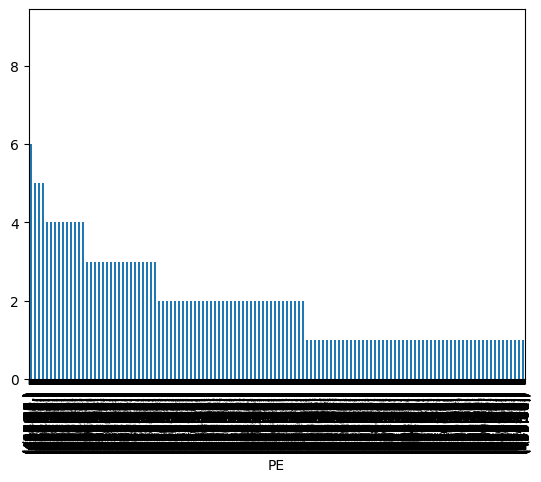

In [39]:
y.value_counts().plot(kind='bar')

In [40]:
from sklearn.pipeline import Pipeline #automated preprocessing
from sklearn.impute import SimpleImputer #replacing missing value
from sklearn.preprocessing import StandardScaler #preprocessing

In [41]:
 num_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='median')),
                            ('scaler',StandardScaler())])


In [42]:
x_pre = num_pipe.fit_transform(x)


In [43]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_pre, y, test_size=0.2, random_state=42)

In [47]:
xtest.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [45]:
ytrain.head()

,PE
5487,442.75
3522,432.52
6916,428.80
7544,426.07
7600,436.58


In [48]:
ytest.head()

,PE
2513,433.27
9411,438.16
8745,458.42
9085,480.82
4950,441.41


In [52]:
ytest.shape

(1914, 1)

In [53]:
xtest.shape

(1914, 4)

In [54]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(n_estimators=1,max_depth=1,min_samples_split=5,min_samples_leaf=5,criterion='entropy')
model1.fit(xtrain,ytrain)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.